connect to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
input_img = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_0X/isn_256.pgm", cv2.IMREAD_GRAYSCALE)

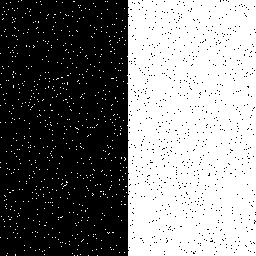

In [ ]:
cv2_imshow(input_img)

In [ ]:
def calculateRange(i, index, tot):
  if (index < i) :
    #not enouth in the upper part
    step = i - index
    return range(-i+step, i+1)

  elif((tot-1)-index < i):
    #not enouth in the lower part
    step = i - (tot - (index + 1))
    return range(-i, i+1-step)

  else:
    #hole filter
    return range(-i, i+1)

In [ ]:
def erosion(image, i):

  nrowfil = 2*i +1

  shape = image.shape
  nrows = image.shape[0]
  ncols = image.shape[1]

  output_img = image.copy()

  for r in range(nrows):
    for c in range(ncols):

      minimum = image[r][c]

      row_fil = calculateRange(i, r, nrows)
      col_fil = calculateRange(i, c, ncols)

      for row in row_fil:
        for col in col_fil:
          pixel = image[r+row][c+col]

          if(pixel < minimum):
            #update the minimum
            minimum = pixel
      output_img[r][c] = minimum

  return output_img

In [ ]:
def dilation(image, i):

  nrowfil = 2*i +1

  shape = image.shape
  nrows = image.shape[0]
  ncols = image.shape[1]

  output_img = image.copy()

  for r in range(nrows):
    for c in range(ncols):

      maximum = image[r][c]

      row_fil = calculateRange(i, r, nrows)
      col_fil = calculateRange(i, c, ncols)

      for row in row_fil:
        for col in col_fil:
          pixel = image[r+row][c+col]

          if(pixel > maximum):
            #update the maximum
            maximum = pixel
      output_img[r][c] = maximum

  return output_img

In [ ]:
def opening(input_img, i):
  step1 = erosion(input_img, i)
  step2 = dilation(step1, i)
  return step2

In [ ]:
def closing(input_img, i):
  step1 = dilation(input_img, i)
  step2 = erosion(step1, i)
  return step2

In [ ]:
def openClose(img, i):
    step1 = opening(img, i)
    step2 = closing(step1, i)
    return step2

In [ ]:
def closeOpen(img, i):
    step1 = closing(img, i)
    step2 = opening(step1, i)
    return step2

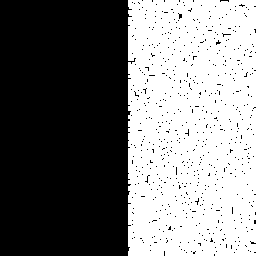

In [ ]:
filter1 = opening(input_img, 1)
cv2_imshow(filter1)

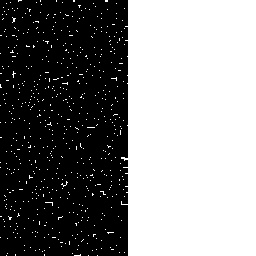

In [ ]:
filter2 = closing(input_img, 1)
cv2_imshow(filter2)

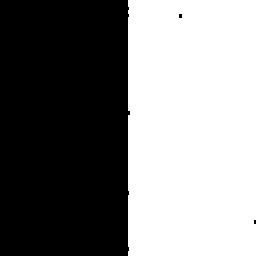

In [ ]:
filter3 = openClose(input_img, 1)
cv2_imshow(filter3)

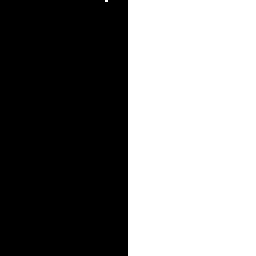

In [ ]:
filter4 = closeOpen(input_img, 1)
cv2_imshow(filter4)

SOLUTION: the best filters are Filter3 and Filter4